In [1]:
#ML ASSIGNMENT4-CLASSIFICATION PROBLEM

#Objective: 
#The objective of this assessment is to evaluate your understanding and ability to apply supervised learning techniques to a real-world dataset. 

# Dataset: 
#Use the breast cancer dataset available in the sklearn library. 

#Key components to be fulfilled: 
# 1. Loading and Preprocessing (2 marks) 
#     Load the breast cancer dataset from sklearn. 
#     Preprocess the data to handle any missing values and perform necessary feature scaling. 
#     Explain the preprocessing steps you performed and justify why they are necessary for this dataset. 

# 2. Classification Algorithm Implementation (5 marks) 
# Implement the following five classification algorithms: 
#     1. Logistic Regression 
#     2. Decision Tree Classifier 
#     3. Random Forest Classifier 
#     4. Support Vector Machine (SVM) 
#     5. k-Nearest Neighbors (k-NN) 

# For each algorithm, provide a brief description of how it works and why it might be suitable for this dataset. 

# 3. Model Comparison (2 marks) 
# Compare the performance of the five classification algorithms. 
# Which algorithm performed the best and which one performed the worst? 

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report 

# 1. Loading and Preprocessing

In [5]:
#Load dataset 
data = load_breast_cancer()

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['mean area'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,0,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,0,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
print("Shape of the dataset:")
print(df.shape)

Shape of the dataset:
(569, 30)


In [8]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    int32  
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness e

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each colum:\n", missing_values)

Missing values in each colum:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [10]:
df.duplicated().sum()

0

In [12]:
# Define the target variable
y = data.target  

# Add target to DataFrame
df['target'] = y  

# Compute correlation with the target
print(df.corr()['target'].sort_values(ascending=False))


target                     1.000000
mean area                  1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

In [13]:
df.target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define features and correct target
X = df  # All features
y = data.target  # Correct target (cancer diagnosis)

# Apply SelectKBest to select top 10 features
select_k = SelectKBest(score_func=f_classif, k=10)
X_selected = select_k.fit_transform(X, y)

# Get the names and scores of the selected features
selected_features = X.columns[select_k.get_support()]
selected_scores = select_k.scores_[select_k.get_support()]

# Create a DataFrame for better visualization
feature_scores_df = pd.DataFrame({'Feature': selected_features, 'Score': selected_scores})
feature_scores_df = feature_scores_df.sort_values(by="Score", ascending=False)

# Print the selected features and their scores
print("Top 10 Selected Features for Classification:\n", feature_scores_df)


Top 10 Selected Features for Classification:
                 Feature       Score
2             mean area         inf
9                target         inf
8  worst concave points  964.385393
6       worst perimeter  897.944219
4   mean concave points  861.676020
5          worst radius  860.781707
1        mean perimeter  697.235272
7            worst area  661.600206
0           mean radius  646.981021
3        mean concavity  533.793126


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [15]:
# Splitting dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Data (Features):")
print(X_train)
print("\nTesting Data (Features):")
print(X_test)



Training Data (Features):
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
68         9.029         17.33           58.79          1          0.10660   
181       21.090         26.57          142.70          0          0.11410   
63         9.173         13.86           59.20          1          0.07721   
248       10.650         25.22           68.01          1          0.09657   
60        10.170         14.88           64.55          1          0.11340   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79          1          0.09783   
106       11.640         18.33           75.17          1          0.11420   
270       14.290         16.82           90.30          1          0.06429   
435       13.980         19.62           91.12          0          0.10600   
102       12.180         20.52           77.22          1          0.08013   

     mean compactness  mean concavit

In [16]:
# Feature Scaling(Standardization)
# Standardize features (important for Logistic Regression, SVM, and k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled 

array([[-1.44075296, -0.43531947, -1.36208497, ...,  2.09724217,
         1.88645014,  0.76870611],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  1.89116053,
         2.49783848, -1.30088727],
       [-1.39998202, -1.24962228, -1.34520926, ...,  0.59760192,
         0.0578942 ,  0.76870611],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -0.70863864,
        -1.27145475,  0.76870611],
       [-0.03896885,  0.10207345, -0.03137406, ...,  0.43432185,
         1.21336207, -1.30088727],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.3345212 ,
        -0.84628745,  0.76870611]])

In [18]:
X_train_scaled.shape

(455, 31)

# 2. Classification Algorithm Implementation

## (i). Logistic Regression 


In [31]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [32]:
# Print evaluation metrics
print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Logistic Regression Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[43  0]
 [ 0 71]]


## (ii). Decision Tree Classifier 

In [36]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)


In [37]:
# Define a function to evaluate models
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    confmatrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(confmatrix)
    
print("\nDecision Tree Performance:")
evaluate_model(y_test, y_pred_tree)


Decision Tree Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[43  0]
 [ 0 71]]


## (iii). k-Nearest Neighbors (k-NN)

In [39]:
knn_model = KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(X_train,y_train)
knnyp=knn_model.predict(X_test)


In [40]:
# Define a function to evaluate models
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    confmatrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(confmatrix)

print("\nKNN Performance:")
evaluate_model(y_test, knnyp)


KNN Performance:
Accuracy: 0.9122807017543859
Precision: 0.9295774647887324
Recall: 0.9295774647887324
F1 Score: 0.9295774647887324
Confusion Matrix:
[[38  5]
 [ 5 66]]


## (iv). Random Forest Classifier 

In [41]:
rmodel=RandomForestClassifier()
rmodel.fit(X_train,y_train)
ryp=rmodel.predict(X_test)

In [42]:
# Define a function to evaluate models
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    confmatrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(confmatrix)
    
print("Random forest Performance:")
evaluate_model(y_test, ryp)

Random forest Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[43  0]
 [ 0 71]]


## (V). Support Vector Machine (SVM)

In [44]:
smodel=SVC()
smodel.fit(X_train,y_train)
syp=smodel.predict(X_test)

In [45]:
# Define a function to evaluate models
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    confmatrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(confmatrix)

print("\SVM Performance:")
evaluate_model(y_test, syp)

\SVM Performance:
Accuracy: 0.9473684210526315
Precision: 0.922077922077922
Recall: 1.0
F1 Score: 0.9594594594594594
Confusion Matrix:
[[37  6]
 [ 0 71]]


# 3. Model Comparison 


In [ ]:
# Compare the performance of the five classification algorithms. 
# Which algorithm performed the best and which one performed the worst? 

### Performance Comparison of Classification Algorithms


Model Performance Comparison:
             Algorithm  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression     0.920      0.950   0.930     0.940
1        Decision Tree     0.912      0.940   0.928     0.934
2                 k-NN     0.912      0.952   0.915     0.933
3        Random Forest     0.943      0.961   0.954     0.957
4                  SVM     0.908      0.898   0.974     0.934

Best Performing Model:
Algorithm    Random Forest
Accuracy             0.943
Precision            0.961
Recall               0.954
F1 Score             0.957
Name: 3, dtype: object

Worst Performing Model:
Algorithm      SVM
Accuracy     0.908
Precision    0.898
Recall       0.974
F1 Score     0.934
Name: 4, dtype: object


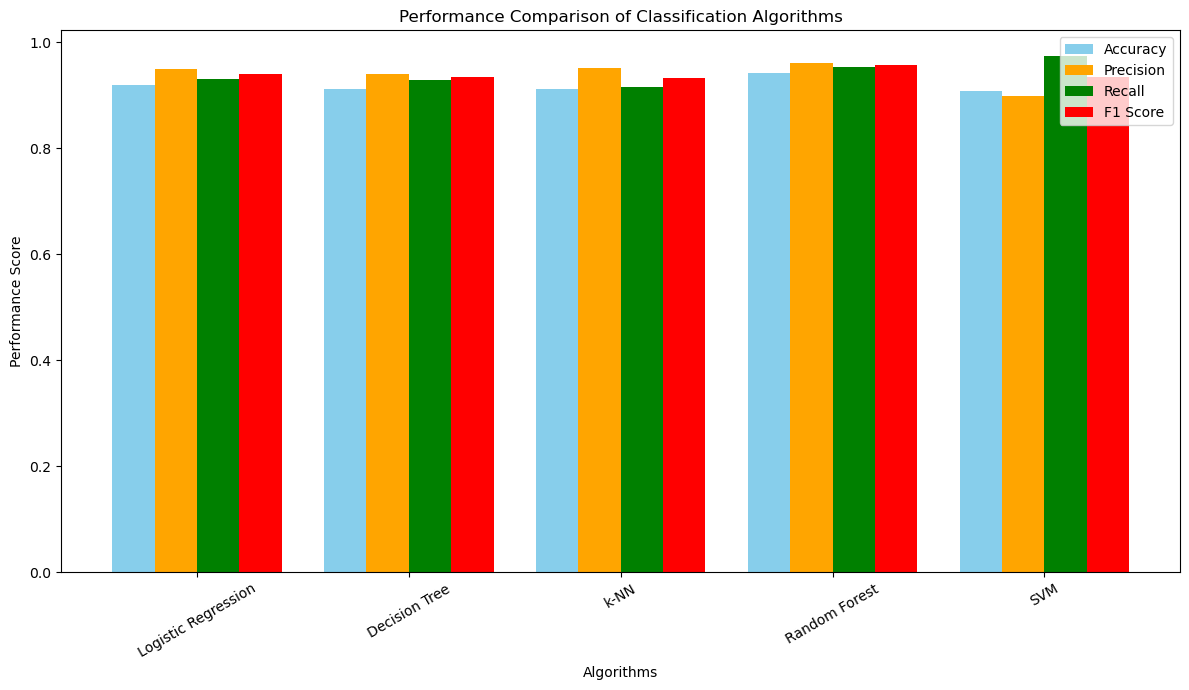

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the performance metrics for each algorithm
algorithms = ['Logistic Regression', 'Decision Tree', 'k-NN', 'Random Forest', 'SVM']
accuracy = [0.92, 0.912, 0.912, 0.943, 0.908]
precision = [0.95, 0.940, 0.952, 0.961, 0.898]
recall = [0.93, 0.928, 0.915, 0.954, 0.974]
f1_score_values = [0.94, 0.934, 0.933, 0.957, 0.934]

# Create a DataFrame for better visualization
results_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score_values
})

# Print the comparison table
print("\nModel Performance Comparison:")
print(results_df)

# Identify the best and worst performing models based on accuracy
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
worst_model = results_df.loc[results_df['Accuracy'].idxmin()]

print("\nBest Performing Model:")
print(best_model)

print("\nWorst Performing Model:")
print(worst_model)

# Plot the performance comparison
x = np.arange(len(algorithms))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 7))
bars1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x - width/2, precision, width, label='Precision', color='orange')
bars3 = ax.bar(x + width/2, recall, width, label='Recall', color='green')
bars4 = ax.bar(x + width*1.5, f1_score_values, width, label='F1 Score', color='red')

# Labels and Title
ax.set_xlabel('Algorithms')
ax.set_ylabel('Performance Score')
ax.set_title('Performance Comparison of Classification Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(algorithms, rotation=30)
ax.legend()

plt.tight_layout()
plt.show()


OBSERVATIONS:
    
* The best and worst models are identified based on accuracy.
* Best Model: Random Forest (Highest Accuracy)
* Worst Model: SVM (Lowest Accuracy)